In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [33]:
# check out the price data
excess_ret = pd.read_excel("data/multi_asset_etf_data.xlsx", sheet_name=3)
excess_ret["Date"] = pd.to_datetime(excess_ret["Date"])
excess_ret.set_index("Date", inplace=True)
excess_ret.sort_index(inplace=True)
excess_ret.drop(columns=['QAI'], inplace=True)

In [34]:
def calculate_risk_metrics(data, periods_per_year=12):

    # annualized excess return
    annualized_excess_return = data.mean() * periods_per_year
    
    # annualized volatility
    annualized_volatility = data.std() * np.sqrt(periods_per_year)
    
    # sharpe ratio
    sharpe_ratio = annualized_excess_return / annualized_volatility
    
    results = pd.DataFrame({
        'Annualized Excess Return': annualized_excess_return,
        'Annualized Volatility': annualized_volatility,
        'Sharpe Ratio': sharpe_ratio
    })
    
    return results

risk_metrics = calculate_risk_metrics(excess_ret)
print(risk_metrics.round(4))

     Annualized Excess Return  Annualized Volatility  Sharpe Ratio
BWX                   -0.0077                 0.0828       -0.0932
DBC                   -0.0053                 0.1666       -0.0318
EEM                    0.0293                 0.1762        0.1665
EFA                    0.0618                 0.1509        0.4094
HYG                    0.0414                 0.0759        0.5449
IEF                    0.0164                 0.0634        0.2586
IYR                    0.0749                 0.1687        0.4441
PSP                    0.0926                 0.2134        0.4338
SPY                    0.1281                 0.1428        0.8971
TIP                    0.0205                 0.0511        0.4011


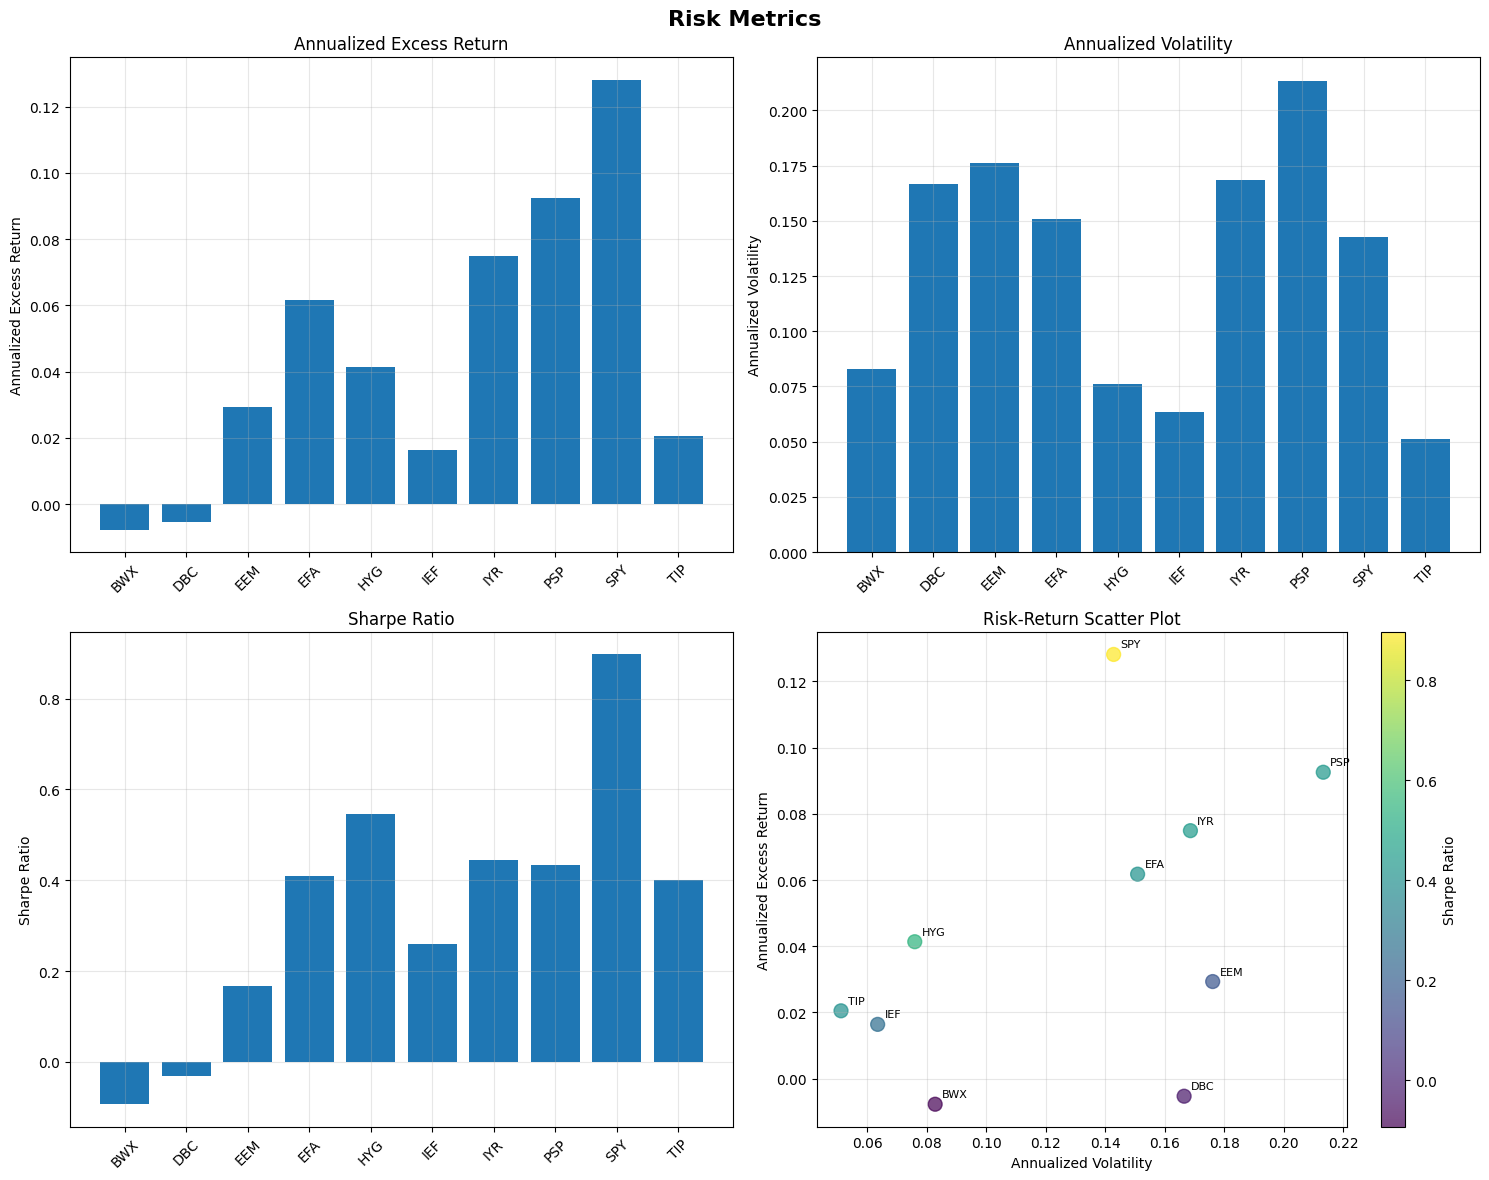

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Risk Metrics', fontsize=16, fontweight='bold')

# 1. Annualized Excess Return
axes[0, 0].bar(risk_metrics.index, risk_metrics['Annualized Excess Return'])
axes[0, 0].set_title('Annualized Excess Return')
axes[0, 0].set_ylabel('Annualized Excess Return')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. Annualized Volatility
axes[0, 1].bar(risk_metrics.index, risk_metrics['Annualized Volatility'])
axes[0, 1].set_title('Annualized Volatility')
axes[0, 1].set_ylabel('Annualized Volatility')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Sharpe Ratio
axes[1, 0].bar(risk_metrics.index, risk_metrics['Sharpe Ratio'])
axes[1, 0].set_title('Sharpe Ratio')
axes[1, 0].set_ylabel('Sharpe Ratio')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 4. Risk-Return Scatter Plot
scatter = axes[1, 1].scatter(risk_metrics['Annualized Volatility'], 
                            risk_metrics['Annualized Excess Return'],
                            s=100, alpha=0.7, c=risk_metrics['Sharpe Ratio'], 
                            cmap='viridis')
axes[1, 1].set_xlabel('Annualized Volatility')
axes[1, 1].set_ylabel('Annualized Excess Return')
axes[1, 1].set_title('Risk-Return Scatter Plot')
axes[1, 1].grid(True, alpha=0.3)

for i, txt in enumerate(risk_metrics.index):
    axes[1, 1].annotate(txt, 
                       (risk_metrics['Annualized Volatility'].iloc[i], 
                        risk_metrics['Annualized Excess Return'].iloc[i]),
                       xytext=(5, 5), textcoords='offset points', fontsize=8)

cbar = plt.colorbar(scatter, ax=axes[1, 1])
cbar.set_label('Sharpe Ratio')

plt.tight_layout()
plt.show()


In [36]:
print("Sharpe Ratio Ranking:")
print("=" * 50)
sorted_by_sharpe = risk_metrics.sort_values('Sharpe Ratio', ascending=False)
for idx, row in sorted_by_sharpe.iterrows():
    print(f"{idx:>10}: Sharpe Ratio = {row['Sharpe Ratio']:>6.3f}, "
          f"Annualized Excess Return = {row['Annualized Excess Return']:>6.3f}, "
          f"Annualized Volatility = {row['Annualized Volatility']:>6.3f}")

print("\n" + "=" * 50)
print("Best Performing Asset (by Sharpe Ratio):", sorted_by_sharpe.index[0])
print("Highest Return Asset:", risk_metrics['Annualized Excess Return'].idxmax())
print("Lowest Volatility Asset:", risk_metrics['Annualized Volatility'].idxmin())

Sharpe Ratio Ranking:
       SPY: Sharpe Ratio =  0.897, Annualized Excess Return =  0.128, Annualized Volatility =  0.143
       HYG: Sharpe Ratio =  0.545, Annualized Excess Return =  0.041, Annualized Volatility =  0.076
       IYR: Sharpe Ratio =  0.444, Annualized Excess Return =  0.075, Annualized Volatility =  0.169
       PSP: Sharpe Ratio =  0.434, Annualized Excess Return =  0.093, Annualized Volatility =  0.213
       EFA: Sharpe Ratio =  0.409, Annualized Excess Return =  0.062, Annualized Volatility =  0.151
       TIP: Sharpe Ratio =  0.401, Annualized Excess Return =  0.021, Annualized Volatility =  0.051
       IEF: Sharpe Ratio =  0.259, Annualized Excess Return =  0.016, Annualized Volatility =  0.063
       EEM: Sharpe Ratio =  0.167, Annualized Excess Return =  0.029, Annualized Volatility =  0.176
       DBC: Sharpe Ratio = -0.032, Annualized Excess Return = -0.005, Annualized Volatility =  0.167
       BWX: Sharpe Ratio = -0.093, Annualized Excess Return = -0.008,

In [37]:
risk_metrics.to_csv("data/risk_metrics.csv", index=True)


Highest Correlation: EFA - PSP: 0.895
Lowest Correlation: DBC - IEF: -0.300


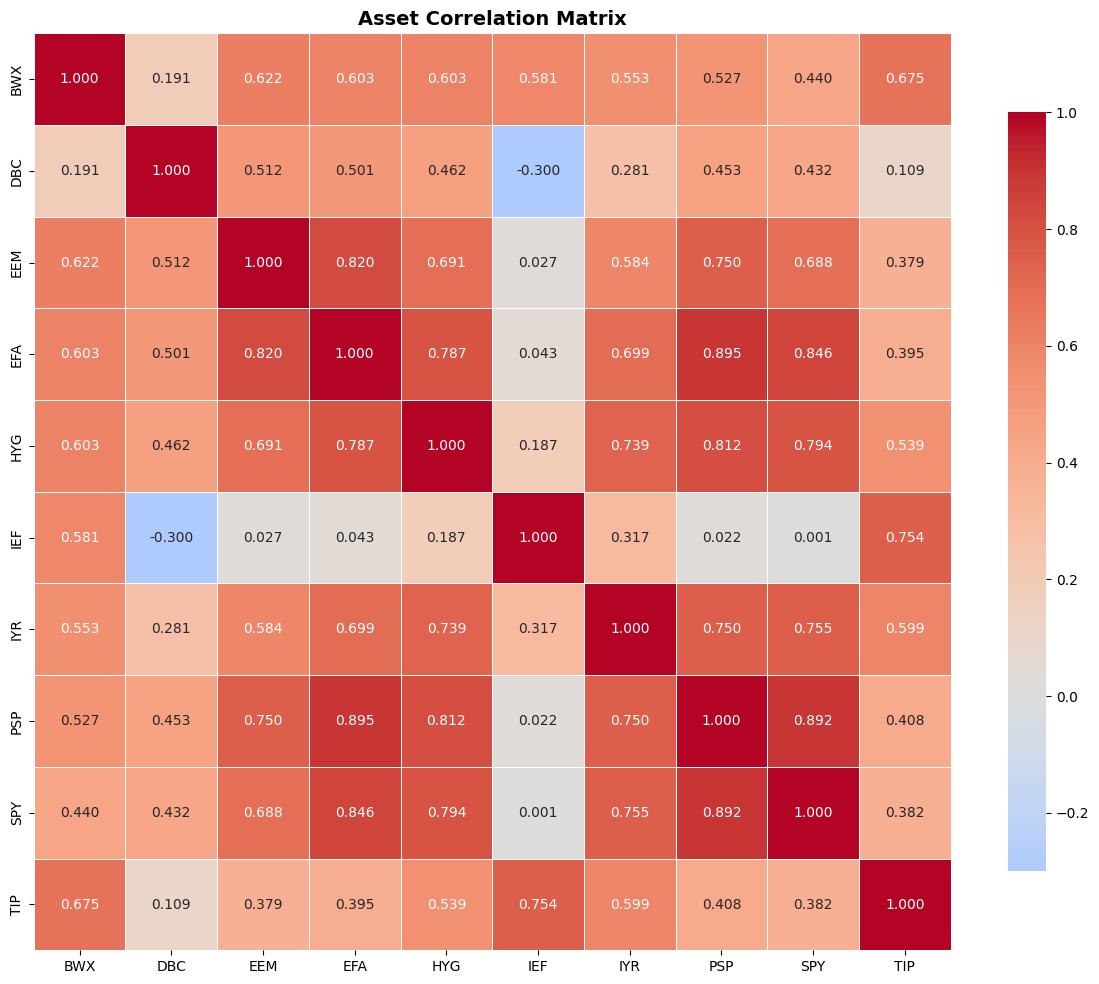

In [38]:
# Cal correlation matrix
correlation_matrix = excess_ret.corr()
correlation_matrix.to_csv("data/correlation_matrix.csv", index=True)
# Find highest and lowest correlations (excluding diagonal)
corr_copy = correlation_matrix.copy()
np.fill_diagonal(corr_copy.values, np.nan)

# Find highest correlation
max_corr = corr_copy.max().max()
max_corr_pair = corr_copy.where(corr_copy == max_corr).stack().index[0]

# Find lowest correlation
min_corr = corr_copy.min().min()
min_corr_pair = corr_copy.where(corr_copy == min_corr).stack().index[0]

print(f"\nHighest Correlation: {max_corr_pair[0]} - {max_corr_pair[1]}: {max_corr:.3f}")
print(f"Lowest Correlation: {min_corr_pair[0]} - {min_corr_pair[1]}: {min_corr:.3f}")

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8},
            fmt='.3f', annot_kws={'size': 10})
plt.title('Asset Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

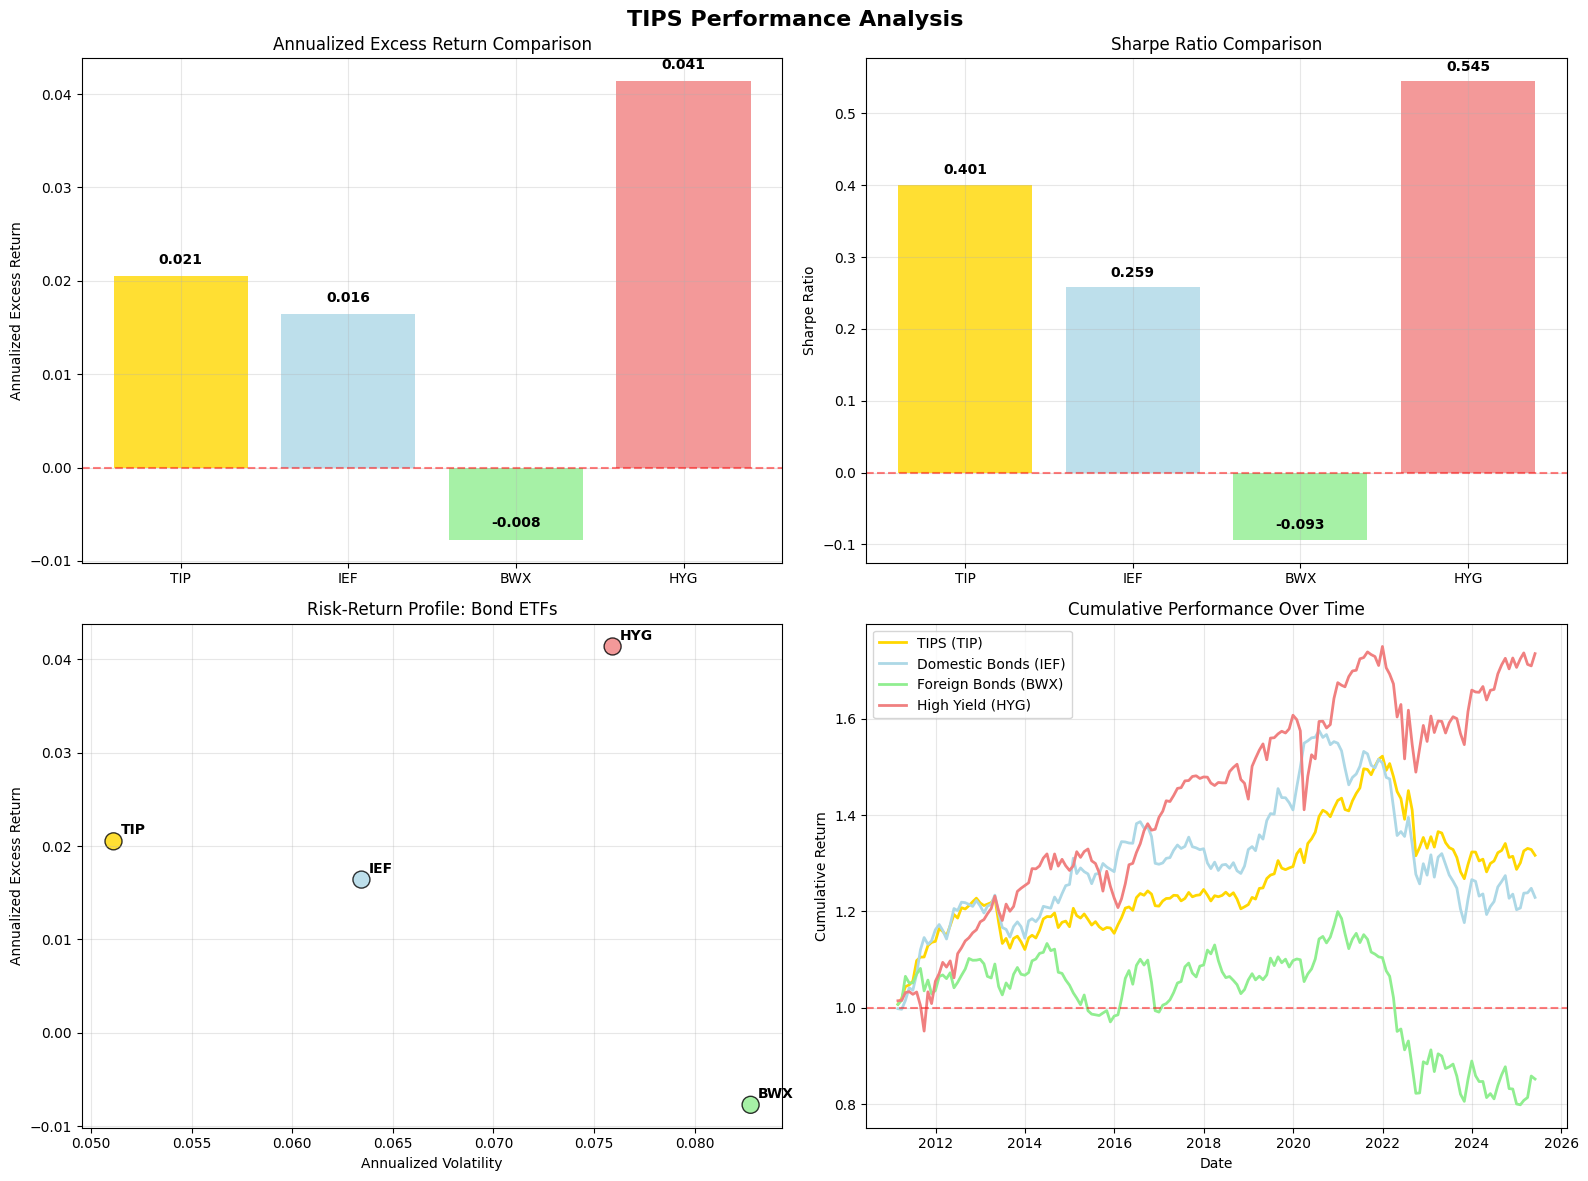


TIPS Analysis:
----------------------------------------
                     Metric TIPS (TIP)
0  Annualized Excess Return   0.020502
1     Annualized Volatility   0.051115
2              Sharpe Ratio   0.401091
3              Max Drawdown  -0.176438
4                  Skewness  -0.647675
5                  Kurtosis    2.56887

TIPS Performance Ranking:
Return Rank: 7 out of 10
Sharpe Rank: 6 out of 10
Volatility Rank: 1 out of 10 (lower is better)


In [39]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('TIPS Performance Analysis', fontsize=16, fontweight='bold')

# 1. Bond ETFs Return Comparison
bond_etfs = ['TIP', 'IEF', 'BWX', 'HYG']
bond_colors = ['gold', 'lightblue', 'lightgreen', 'lightcoral']

axes[0, 0].bar(bond_etfs, risk_metrics.loc[bond_etfs, 'Annualized Excess Return'], 
               color=bond_colors, alpha=0.8)
axes[0, 0].set_title('Annualized Excess Return Comparison')
axes[0, 0].set_ylabel('Annualized Excess Return')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)

for i, v in enumerate(risk_metrics.loc[bond_etfs, 'Annualized Excess Return']):
    axes[0, 0].text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Bond ETFs Sharpe Ratio Comparison
axes[0, 1].bar(bond_etfs, risk_metrics.loc[bond_etfs, 'Sharpe Ratio'], 
               color=bond_colors, alpha=0.8)
axes[0, 1].set_title('Sharpe Ratio Comparison')
axes[0, 1].set_ylabel('Sharpe Ratio')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)

for i, v in enumerate(risk_metrics.loc[bond_etfs, 'Sharpe Ratio']):
    axes[0, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. Risk-Return Scatter Plot for Bonds
scatter = axes[1, 0].scatter(risk_metrics.loc[bond_etfs, 'Annualized Volatility'], 
                            risk_metrics.loc[bond_etfs, 'Annualized Excess Return'],
                            s=150, alpha=0.8, c=bond_colors, edgecolors='black', linewidth=1)

axes[1, 0].set_xlabel('Annualized Volatility')
axes[1, 0].set_ylabel('Annualized Excess Return')
axes[1, 0].set_title('Risk-Return Profile: Bond ETFs')
axes[1, 0].grid(True, alpha=0.3)

# Add labels for each point
for i, etf in enumerate(bond_etfs):
    axes[1, 0].annotate(etf, 
                       (risk_metrics.loc[etf, 'Annualized Volatility'], 
                        risk_metrics.loc[etf, 'Annualized Excess Return']),
                       xytext=(5, 5), textcoords='offset points', 
                       fontsize=10, fontweight='bold')

# 4. Cumulative Performance Comparison
# Calculate cumulative returns
cumulative_returns = (1 + excess_ret[bond_etfs]).cumprod()

axes[1, 1].plot(cumulative_returns.index, cumulative_returns['TIP'], 
                label='TIPS (TIP)', color='gold', linewidth=2)
axes[1, 1].plot(cumulative_returns.index, cumulative_returns['IEF'], 
                label='Domestic Bonds (IEF)', color='lightblue', linewidth=2)
axes[1, 1].plot(cumulative_returns.index, cumulative_returns['BWX'], 
                label='Foreign Bonds (BWX)', color='lightgreen', linewidth=2)
axes[1, 1].plot(cumulative_returns.index, cumulative_returns['HYG'], 
                label='High Yield (HYG)', color='lightcoral', linewidth=2)

axes[1, 1].set_title('Cumulative Performance Over Time')
axes[1, 1].set_ylabel('Cumulative Return')
axes[1, 1].set_xlabel('Date')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=1, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Additional detailed TIPS analysis
print("\nTIPS Analysis:")
print("-" * 40)

# Performance metrics table
tips_analysis = pd.DataFrame({
    'Metric': ['Annualized Excess Return', 'Annualized Volatility', 'Sharpe Ratio', 
               'Max Drawdown', 'Skewness', 'Kurtosis'],
    'TIPS (TIP)': [
        risk_metrics.loc['TIP', 'Annualized Excess Return'],
        risk_metrics.loc['TIP', 'Annualized Volatility'],
        risk_metrics.loc['TIP', 'Sharpe Ratio'],
        excess_ret['TIP'].cumsum().cummax() - excess_ret['TIP'].cumsum(),
        excess_ret['TIP'].skew(),
        excess_ret['TIP'].kurtosis()
    ]
})

# Calculate max drawdown properly
tips_cumsum = excess_ret['TIP'].cumsum()
tips_running_max = tips_cumsum.expanding().max()
tips_drawdown = tips_cumsum - tips_running_max
tips_analysis.loc[3, 'TIPS (TIP)'] = tips_drawdown.min()

print(tips_analysis.round(4))

# Performance ranking
print(f"\nTIPS Performance Ranking:")
print(f"Return Rank: {risk_metrics['Annualized Excess Return'].rank(ascending=False)['TIP']:.0f} out of {len(risk_metrics)}")
print(f"Sharpe Rank: {risk_metrics['Sharpe Ratio'].rank(ascending=False)['TIP']:.0f} out of {len(risk_metrics)}")
print(f"Volatility Rank: {risk_metrics['Annualized Volatility'].rank(ascending=True)['TIP']:.0f} out of {len(risk_metrics)} (lower is better)")

In [40]:
# Vector of monthly expected excess returns
mu_m = excess_ret.mean()    
print(mu_m)

# Monthly covariance matrix
Sigma_m = excess_ret.cov()     
print(Sigma_m)

# Retrieve asset tickers
assets = mu_m.index.tolist()

# Create functions to compute MV-solutions
Sigma_inv = pd.DataFrame(np.linalg.pinv(Sigma_m.values), index=assets, columns=assets)

def tangency_weights(mu, Sigma_inv):
    """
    w^tan = (Sigma^{-1} mu) / (1' Sigma^{-1} mu)
    Tangency weights sum to 1 
    """
    z = Sigma_inv @ mu
    denom = float(np.ones(len(mu)) @ z) # weights sum to 1
    return (z / denom)

def portfolio_stats(w, mu, Sigma, periods_per_year=12):
    """
    Compute annualized (mean, vol, sharpe) for weights w given monthly mu and Sigma.
    """
    mu_p_m = float(w @ mu) # monthly portfolio mean
    var_p_m = float(w.T @ Sigma @ w) # monthly portfolio variance
    vol_p_m = np.sqrt(var_p_m)
    # Annualize 
    mu_p_a = mu_p_m * 12
    vol_p_a = vol_p_m * np.sqrt(12)
    sharpe_a = mu_p_a / vol_p_a if vol_p_a > 0 else np.nan
    return mu_p_a, vol_p_a, sharpe_a

BWX   -0.000643
DBC   -0.000441
EEM    0.002445
EFA    0.005148
HYG    0.003448
IEF    0.001367
IYR    0.006243
PSP    0.007713
SPY    0.010678
TIP    0.001708
dtype: float64
          BWX       DBC       EEM       EFA       HYG           IEF       IYR  \
BWX  0.000571  0.000220  0.000756  0.000628  0.000316  2.542502e-04  0.000643   
DBC  0.000220  0.002312  0.001251  0.001049  0.000487 -2.643418e-04  0.000657   
EEM  0.000756  0.001251  0.002586  0.001816  0.000770  2.487046e-05  0.001446   
EFA  0.000628  0.001049  0.001816  0.001898  0.000752  3.401706e-05  0.001483   
HYG  0.000316  0.000487  0.000770  0.000752  0.000480  7.516839e-05  0.000789   
IEF  0.000254 -0.000264  0.000025  0.000034  0.000075  3.354040e-04  0.000282   
IYR  0.000643  0.000657  0.001446  0.001483  0.000789  2.822681e-04  0.002371   
PSP  0.000775  0.001342  0.002350  0.002402  0.001096  2.530885e-05  0.002249   
SPY  0.000434  0.000857  0.001442  0.001519  0.000717  6.152957e-07  0.001515   
TIP  0.000238  

In [41]:
# Compute and output weights
w_tan = tangency_weights(mu_m.values, Sigma_inv.values)
w_tan = pd.Series(w_tan, index=assets, name='Tangency Weight')
w_tan.to_csv("data/tangency_weights.csv")

print("\nTangency Portfolio Weights:")
print(w_tan.sort_values(ascending=False).round(2))

# Tangency portfolio performance
tan_mean_a, tan_vol_a, tan_sharpe_a = portfolio_stats(w_tan.values, mu_m.values, Sigma_m.values)
print(f"\nTangency Portfolio Performance (annualized):")
print(f"Mean: {tan_mean_a:.3f}  Vol: {tan_vol_a:.3f}  Sharpe: {tan_sharpe_a:.3f}")


Tangency Portfolio Weights:
SPY    1.06
IEF    0.88
HYG    0.29
TIP    0.18
EFA    0.07
EEM    0.03
DBC   -0.07
IYR   -0.25
PSP   -0.33
BWX   -0.85
Name: Tangency Weight, dtype: float64

Tangency Portfolio Performance (annualized):
Mean: 0.129  Vol: 0.087  Sharpe: 1.469


In [42]:
# Compare tangency weights ranking vs individual asset Sharpe ranking
weight_rank = w_tan.rank(ascending=False, method='min')
sharpe_rank = risk_metrics['Sharpe Ratio'].rank(ascending=False, method='min')

align_df = pd.DataFrame({
    'Weight': w_tan,
    'Weight Rank (desc)': weight_rank,
    'Sharpe Ratio': risk_metrics['Sharpe Ratio'],
    'Sharpe Rank (desc)': sharpe_rank
}).sort_values('Weight Rank (desc)')

print("\nRanking comparison: tangency weights vs individual Sharpe")
print(align_df.round(4))

# Correlation (Spearman) between Ranks
rho = weight_rank.corr(sharpe_rank, method='spearman')
print(f"\nSpearman rank correlation (weights ranks vs Sharpe ranks): {rho:.3f}")
align_df.to_csv("data/weight_vs_sharpe_ranks.csv")


Ranking comparison: tangency weights vs individual Sharpe
     Weight  Weight Rank (desc)  Sharpe Ratio  Sharpe Rank (desc)
SPY  1.0596                 1.0        0.8971                 1.0
IEF  0.8812                 2.0        0.2586                 7.0
HYG  0.2906                 3.0        0.5449                 2.0
TIP  0.1753                 4.0        0.4011                 6.0
EFA  0.0687                 5.0        0.4094                 5.0
EEM  0.0264                 6.0        0.1665                 8.0
DBC -0.0716                 7.0       -0.0318                 9.0
IYR -0.2466                 8.0        0.4441                 3.0
PSP -0.3330                 9.0        0.4338                 4.0
BWX -0.8506                10.0       -0.0932                10.0

Spearman rank correlation (weights ranks vs Sharpe ranks): 0.467


In [43]:
# Double check
if 'TIP' not in assets:
    raise ValueError("TIP column not found. Make sure TIPS ticker is 'TIP' in your data.")

In [44]:
# A function to compute tangency portfolio and stats
def run_tangency(mu_series, Sigma_df, label):
    Sigma_inv_local = pd.DataFrame(np.linalg.pinv(Sigma_df.values), index=Sigma_df.index, columns=Sigma_df.columns)
    w = tangency_weights(mu_series.values, Sigma_inv_local.values)
    w = pd.Series(w, index=mu_series.index, name=f'w_tan_{label}')
    mean_a, vol_a, sharpe_a = portfolio_stats(w.values, mu_series.values, Sigma_df.values)
    return w, mean_a, vol_a, sharpe_a

# Tangency portfolio if TIPS included (baseline for comparison)
w_tan_base, mean_a_base, vol_a_base, sharpe_a_base = run_tangency(mu_m, Sigma_m, 'base')

# 1) Drop TIPS
cols_no_tip = [c for c in assets if c != 'TIP']
mu_no_tip   = mu_m.loc[cols_no_tip]
Sigma_no_tip= Sigma_m.loc[cols_no_tip, cols_no_tip]

w_tan_no_tip, mean_a_no_tip, vol_a_no_tip, sharpe_a_no_tip = run_tangency(mu_no_tip, Sigma_no_tip, 'noTIP')

# 2) Increase TIPS excess return by 0.0012
mu_boost_tip = mu_m.copy()
mu_boost_tip.loc['TIP'] = mu_boost_tip.loc['TIP'] + 0.0012

w_tan_boost, mean_a_boost, vol_a_boost, sharpe_a_boost = run_tangency(mu_boost_tip, Sigma_m, 'TIPboost')

# Compare weights & performance
summary_rows = []
summary_rows.append(['Baseline', mean_a_base, vol_a_base, sharpe_a_base,
                     w_tan_base.get('TIP', np.nan)])
summary_rows.append(['Drop TIPS',  mean_a_no_tip, vol_a_no_tip, sharpe_a_no_tip,
                     np.nan])
summary_rows.append(['TIPS +12bp/mo', mean_a_boost, vol_a_boost, sharpe_a_boost,
                     w_tan_boost.get('TIP', np.nan)])

summary = pd.DataFrame(summary_rows, columns=['Case','Ann. Mean','Ann. Vol','Ann. Sharpe','TIPS Weight'])
print("\nTangency Portfolio Summary Across TIPS Scenarios:")
print(summary.round(4))
summary.to_csv("data/tangency_summary_TIPS_scenarios.csv", index=False)

# Ouput weight tables for each case
w_tan_base.to_csv("data/tangency_weights_baseline.csv")
w_tan_no_tip.to_csv("data/tangency_weights_noTIP.csv")
w_tan_boost.to_csv("data/tangency_weights_TIPboost.csv")


Tangency Portfolio Summary Across TIPS Scenarios:
            Case  Ann. Mean  Ann. Vol  Ann. Sharpe  TIPS Weight
0       Baseline     0.1285    0.0875       1.4692       0.1753
1      Drop TIPS     0.1327    0.0905       1.4675          NaN
2  TIPS +12bp/mo     0.1204    0.0746       1.6124       1.2825


# TIPS comparison

From the results above, we see that dropping TIPS results in an increase in both mean and vol, so the Sharpe ratio remains about the same (decreasing slightly). Additionally, an increase in TIPS return by 12 basis points per month significantly decreaes vol (as we weight towards TIPS, mean goes down but vol decreases further), causing an improvement in the Sharpe ratio. Based on these results, we can conclude that TIPS is a useful asset to expand the investment set because the potential upside in increases in TIPS returns can increase the fund's Sharpe ratio, while its inclusion does not negatively impact the fund's volatility or Sharpe. 

In [45]:
# Part 3: Allocations

TARGET_MEAN_EXCESS_RETURN = 0.01

# building EW portfolio:
EW_series = excess_ret.mean(axis=1)
EW_scaled_series = EW_series * (TARGET_MEAN_EXCESS_RETURN / EW_series.mean())

# building RP portfolio:
variance_dict = {i: 1 / excess_ret[i].var() for i in excess_ret.columns}
RP_df = excess_ret.copy()
for k, v in variance_dict.items():
    RP_df[k] = RP_df[k] * v
RP_series = RP_df.sum(axis=1)
RP_scaled_series = RP_series * (TARGET_MEAN_EXCESS_RETURN / RP_series.mean())

# building MV portfolio:
cov_matrix_inv = np.linalg.pinv(excess_ret.cov().values)
rets_vec = excess_ret.mean().values
mv_weights = cov_matrix_inv.dot(rets_vec)
MV_df = excess_ret.copy()
for i, w in enumerate(mv_weights):
    MV_df.iloc[:, i] = MV_df.iloc[:, i] * w
MV_series = MV_df.sum(axis=1)
MV_scaled_series = MV_series * (TARGET_MEAN_EXCESS_RETURN / MV_series.mean())

In [46]:
def describe_performance(portfolio_name, portfolio_series):
    annualized_mean = portfolio_series.mean() * 12
    annualized_vol = portfolio_series.var() * 12
    annualized_sharpe = annualized_mean / (annualized_vol ** 0.5)

    print(f"Performance of {portfolio_name}: \nAnnualized mean: {annualized_mean:.4f}\nAnnualized vol: {annualized_vol:.4f}\nAnnualized Sharpe: {annualized_sharpe:.4f}\n ")

describe_performance("Equal Weight Portfolio", EW_scaled_series)
describe_performance("Risk-Parity Portfolio", RP_scaled_series)
describe_performance("Mean-Variance Portfolio", MV_scaled_series)

Performance of Equal Weight Portfolio: 
Annualized mean: 0.1200
Annualized vol: 0.0725
Annualized Sharpe: 0.4457
 
Performance of Risk-Parity Portfolio: 
Annualized mean: 0.1200
Annualized vol: 0.0697
Annualized Sharpe: 0.4547
 
Performance of Mean-Variance Portfolio: 
Annualized mean: 0.1200
Annualized vol: 0.0067
Annualized Sharpe: 1.4692
 


# Performance comparison: 

We constructed these portfolios so that their mean return would be the same across all portfolios, but we can prefer the portfolios with lower volatility when returns are equal. In this case, the mean-variance portfolio had the lowest volatility (as we optimized for exactly this), while the equal-weight portfolio and the risk-parity portfolio both had approximately the same volatility, with the risk-parity portfolio having slightly lower volatility. 